# Main Library

In [1]:
# Reading Data & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing & Encoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Building Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# XGBoost
import xgboost as xgb

In [3]:
data = pd.read_excel(r"D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\Stock Market Price\Microsoft_20years_Stock.xlsx")

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.623899,38409100,30.959999
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.631531,49749600,30.770000
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.486507,58182400,30.450001
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.242258,50559700,30.660000
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.402540,51197400,30.270000


## Visualize Data

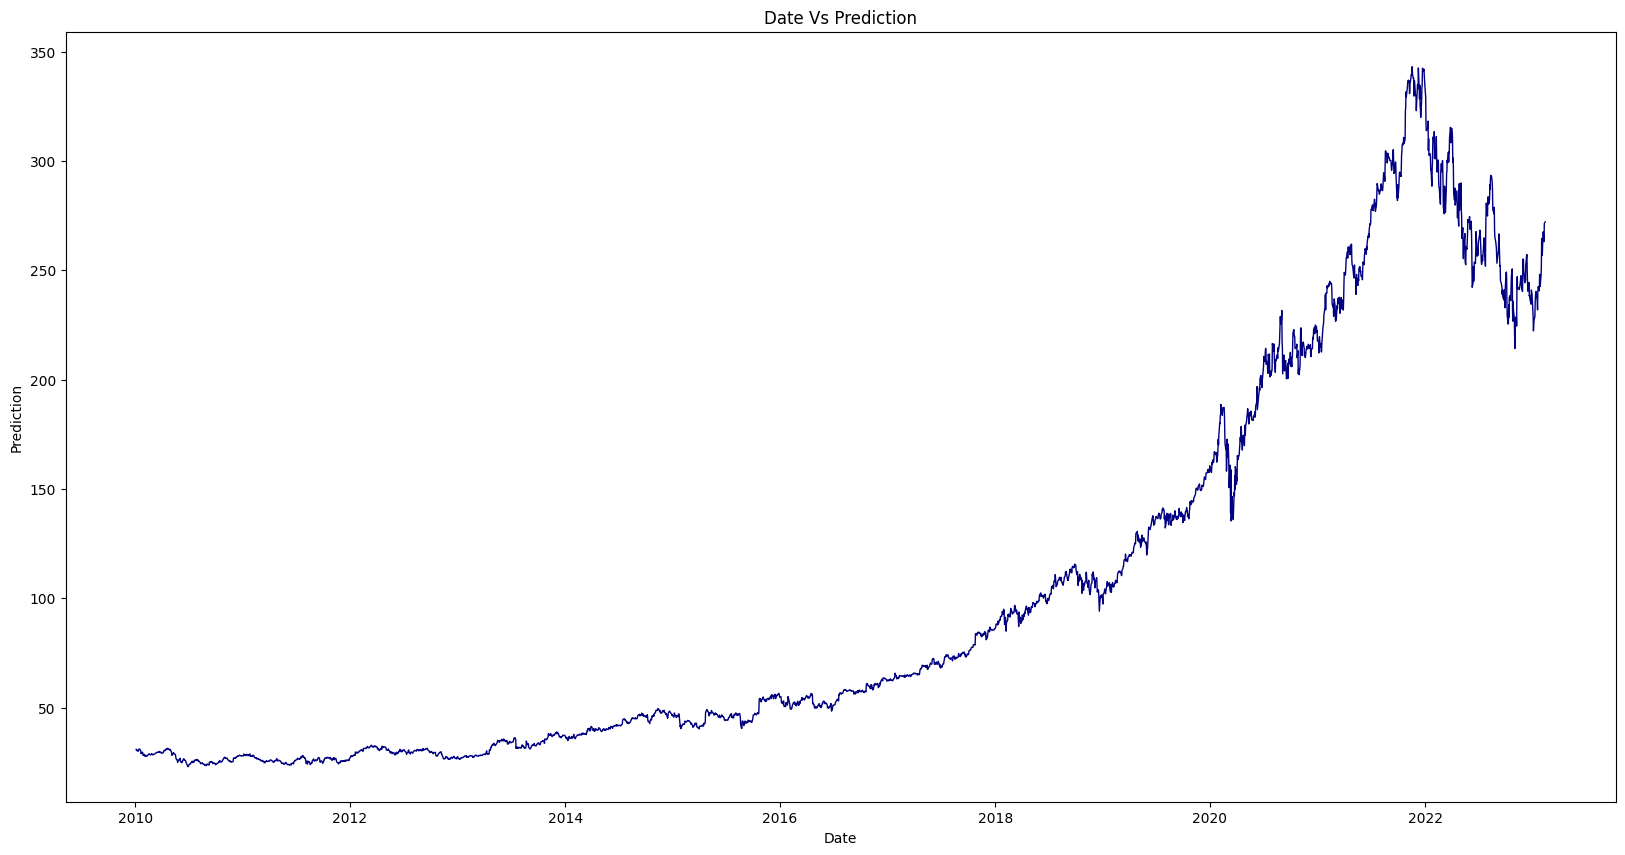

In [4]:
plt.figure(figsize=(20, 10))
plt.plot(data["Date"], data["Prediction"], c="navy", lw=1)
plt.title("Date Vs Prediction")
plt.xlabel("Date")
plt.ylabel("Prediction")
plt.show()

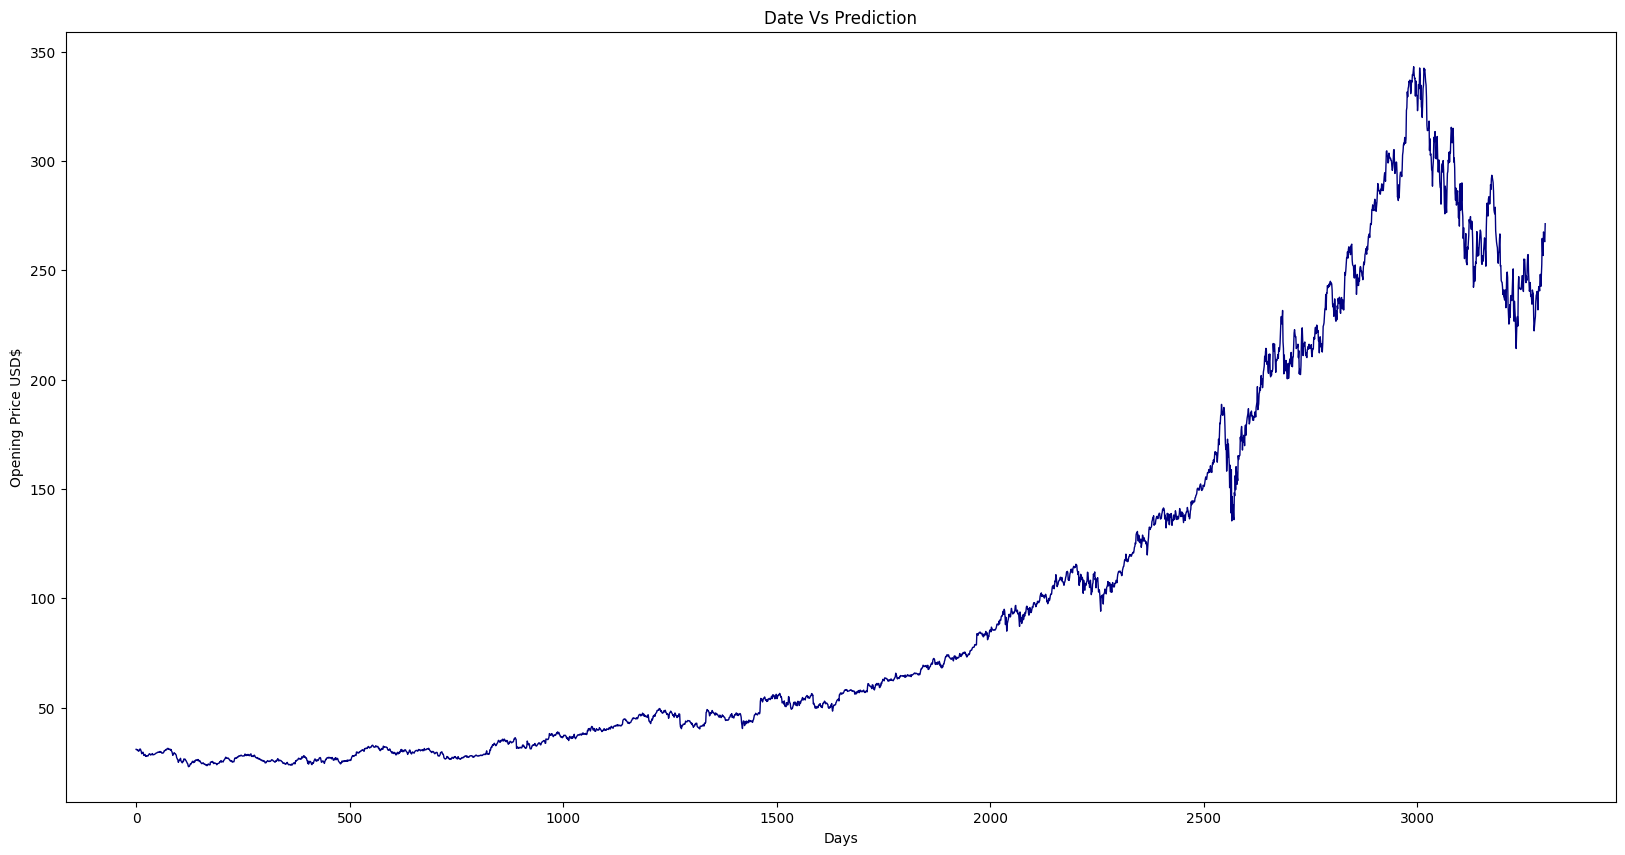

In [5]:
plt.figure(figsize=(20, 10))
plt.plot(data["Close"], c="navy", lw=1)
plt.title("Date Vs Prediction")
plt.xlabel("Days")
plt.ylabel("Opening Price USD$")
plt.show()

In [6]:
data = data.drop(columns="Date", axis=1)

In [7]:
data.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Prediction    0
dtype: int64

## Data Not Have None Value

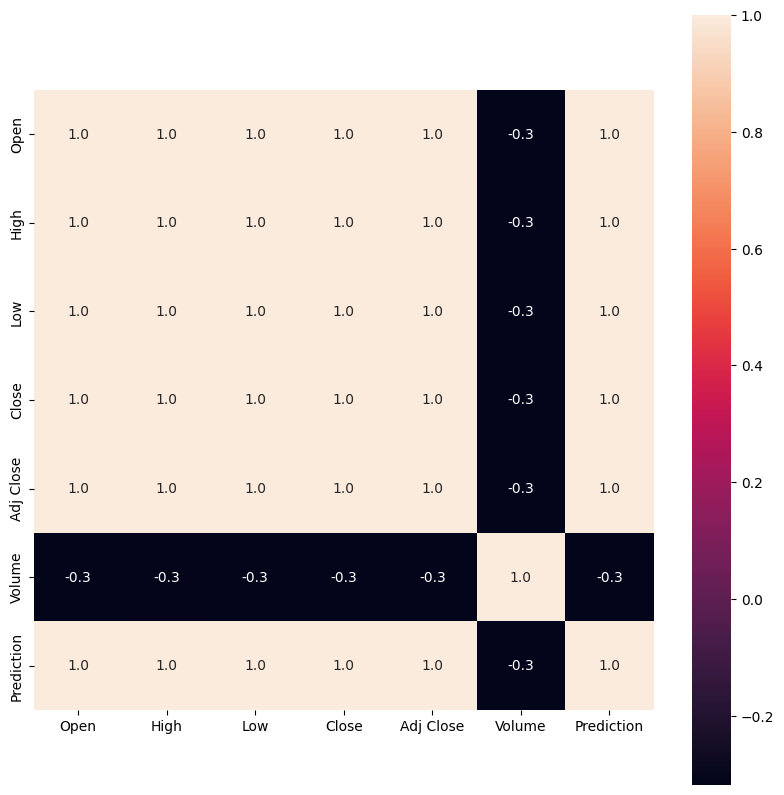

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), square=True, annot=True, fmt="0.1f")
plt.show()

## Note :
Correlation Between Columns Called Volume And Any Columns in Data Is not Good But is Bad

In [9]:
data = data.drop(columns="Volume", axis=1)

In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Prediction
0,30.620001,31.100000,30.590000,30.950001,23.623899,30.959999
1,30.850000,31.100000,30.639999,30.959999,23.631531,30.770000
2,30.879999,31.080000,30.520000,30.770000,23.486507,30.450001
3,30.629999,30.700001,30.190001,30.450001,23.242258,30.660000
4,30.280001,30.879999,30.240000,30.660000,23.402540,30.270000


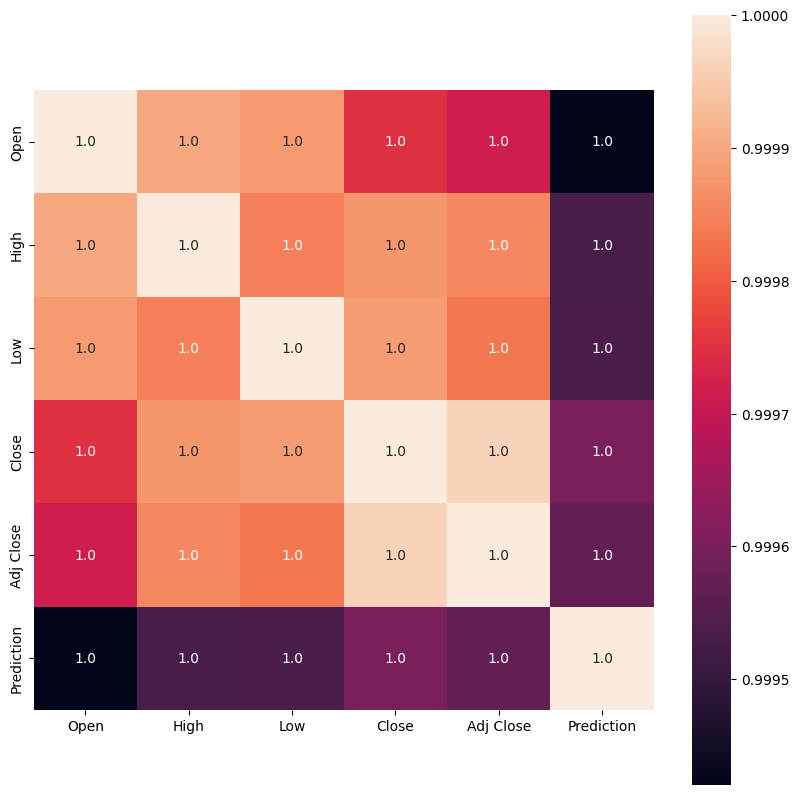

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), square=True, annot=True, fmt="0.1f")
plt.show()

## Splitting Data

In [12]:
X = data.drop(columns="Prediction", axis=1)
Y = data["Prediction"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

# Building Model

## Model 1 ==> RandomForestRegressor

In [13]:
# Model 1 ==> Random Forest
model_RF = RandomForestRegressor()
model_RF.fit(x_train, y_train)

print(f"The Accuracy Score Of Training Data is ==> {model_RF.score(x_train, y_train)}")
print(f"The Accuracy Score Of Testing Data is ==> {model_RF.score(x_test, y_test)}")

The Accuracy Score Of Training Data is ==> 0.9998585780914974
The Accuracy Score Of Testing Data is ==> 0.9991938361482566


## Model 2 ==> XGBRegressor

In [14]:
model_xgb = xgb.XGBRegressor(n_estimators=1000, max_depth=2000,
                             learning_rate=0.1,
                             min_child_weight=0.1)
                             
model_xgb.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_xgb.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_xgb.score(x_test, y_test)}")

The predict Score Train is ==> 0.9999999998908286
%----------------------------------------------------------%
The predict Score Test is ==> 0.9990198869938157


## Model 3 ==> AdaBoostRegressor

In [15]:
Adaboost_reg = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=200, 
                                                                    min_samples_split=30,
                                                                    min_samples_leaf=5),
                              n_estimators=100,
                              learning_rate=0.1)


Adaboost_reg.fit(x_train, y_train)

print(f"The predict Score Train is ==> {Adaboost_reg.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {Adaboost_reg.score(x_test, y_test)}")

The predict Score Train is ==> 0.9997955049629366
%----------------------------------------------------------%
The predict Score Test is ==> 0.999121104638621
